In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
!git clone https://github.com/bearpelican/musicautobot.git

Cloning into 'musicautobot'...
remote: Enumerating objects: 4131, done.
remote: Total 4131 (delta 0), reused 0 (delta 0), pack-reused 4131
Receiving objects: 100% (4131/4131), 83.43 MiB | 24.07 MiB/s, done.
Resolving deltas: 100% (2992/2992), done.


In [ ]:
!apt install musescore fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  avahi-daemon bind9-host desktop-file-utils fluid-soundfont-gm
  fluidr3mono-gm-soundfont geoclue-2.0 geoip-database
  gstreamer1.0-plugins-base iio-sensor-proxy libavahi-core7 libavahi-glib1
  libbind9-160 libbrotli1 libcap2-bin libcdparanoia0 libdaemon0 libdns1100
  libfluidsynth1 libgeoclue-2-0 libgeoip1 libgl1-mesa-glx
  libgstreamer-plugins-base1.0-0 libgstreamer1.0-0 libhyphen0 libisc169
  libisccc160 libisccfg160 liblwres160 libmbim-glib4 libmbim-proxy libmm-glib0
  libnl-genl-3-200 libnss-mdns liborc-0.4-0 libpam-cap libportaudio2
  libpulsedsp libqmi-glib5 libqmi-proxy libqt5help5 libqt5positioning5
  libqt5qml5 libqt5quick5 libqt5sensors5 libqt5sql5-sqlite libqt5svg5


In [ ]:
!pip install torch fastai music21 pebble fluidsynth midi2audio

  Created wheel for fluidsynth: filename=fluidsynth-0.2-py3-none-any.whl size=4513 sha256=7dfe6037ec7e84dfcf6218e41dd8687d8b1a34b8a45035a8ca856efff26dea5f
  Stored in directory: /root/.cache/pip/wheels/44/4b/81/dee2d535b2dd27af13c230ba49aa6f05a5dff0f57c68acef55
Successfully built fluidsynth


In [ ]:
import os
os.chdir('../../')


In [ ]:
!pip install musicautobot

In [ ]:
from musicautobot.numpy_encode import *
from musicautobot.utils.file_processing import process_all, process_file
from musicautobot.config import *
from musicautobot.music_transformer import *
from musicautobot.utils.setup_musescore import setup_musescore
setup_musescore()

In [ ]:
midi_path = Path('/content/drive/MyDrive/data/midi/examples')
midi_path.mkdir(parents=True, exist_ok=True)
data_path = Path('/content/drive/MyDrive/data/numpy')
data_path.mkdir(parents=True, exist_ok=True)

data_save_name = 'musicitem_data_save.pkl'

In [ ]:
midi_files = get_files(midi_path, '.mid', recurse=True); len(midi_files)

30

In [ ]:
processors = [Midi2ItemProcessor()]
data = MusicDataBunch.from_files(midi_files, 
                                 data_path, 
                                 processors=processors,
                                 bs=2, bptt=12)
data.save(data_save_name)

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


In [ ]:
data.train_dl.on_epoch_begin()
x, y = data.one_batch();
x, y

(tensor([[[  0,   0],
          [  1,   0],
          [ 68,   0],
          [142,   0],
          [ 63,   0],
          [142,   0],
          [ 59,   0],
          [142,   0],
          [ 56,   0],
          [142,   0],
          [  8,   0],
          [142,   0]],
 
         [[138, 892],
          [ 69, 892],
          [141, 892],
          [ 65, 892],
          [139, 892],
          [ 53, 892],
          [139, 892],
          [  8, 892],
          [138, 892],
          [105, 893],
          [138, 893],
          [ 84, 893]]]), tensor([[[  1,   0],
          [ 68,   0],
          [142,   0],
          [ 63,   0],
          [142,   0],
          [ 59,   0],
          [142,   0],
          [ 56,   0],
          [142,   0],
          [  8,   0],
          [142,   0],
          [ 67,   5]],
 
         [[ 69, 892],
          [141, 892],
          [ 65, 892],
          [139, 892],
          [ 53, 892],
          [139, 892],
          [  8, 892],
          [138, 892],
          [105, 893],
  

In [ ]:
batch_size = 1
encode_position = True
dl_tfms = [batch_position_tfm] if encode_position else []
data = load_data(data_path, data_save_name, bs=batch_size, encode_position=encode_position, dl_tfms=dl_tfms)

In [ ]:
config = default_config()
config['encode_position'] = encode_position
learn = music_model_learner(data, config=config.copy())

In [14]:
learn.fit_one_cycle(1)
#learn.fit_one_cycle(4): half-day loading

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/musicautobot/music_transformer/model.py:63: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bar_pos = pos // self.beat_len % self.max_bar_len


epoch,train_loss,valid_loss,accuracy,time
0,2.873277,2.830957,0.370542,2:50:30


In [15]:
learn.save('example')

PosixPath('/content/drive/MyDrive/data/numpy/models/example.pth')

In [16]:
midi_file = Path('/content/drive/MyDrive/data/midi/examples/buffer/be_roman.mid'); midi_file
item = MusicItem.from_file(midi_file, data.vocab);

In [17]:
example = Path('/content/drive/MyDrive/data/numpy/models/example.pth')
learn = music_model_learner(data, config=config.copy(),pretrained_path=example)

In [ ]:
!pip install MusicXML
!pip install MuseScore
!pip install music21

     |████████████████████████████████| 291 kB 5.0 MB/s 


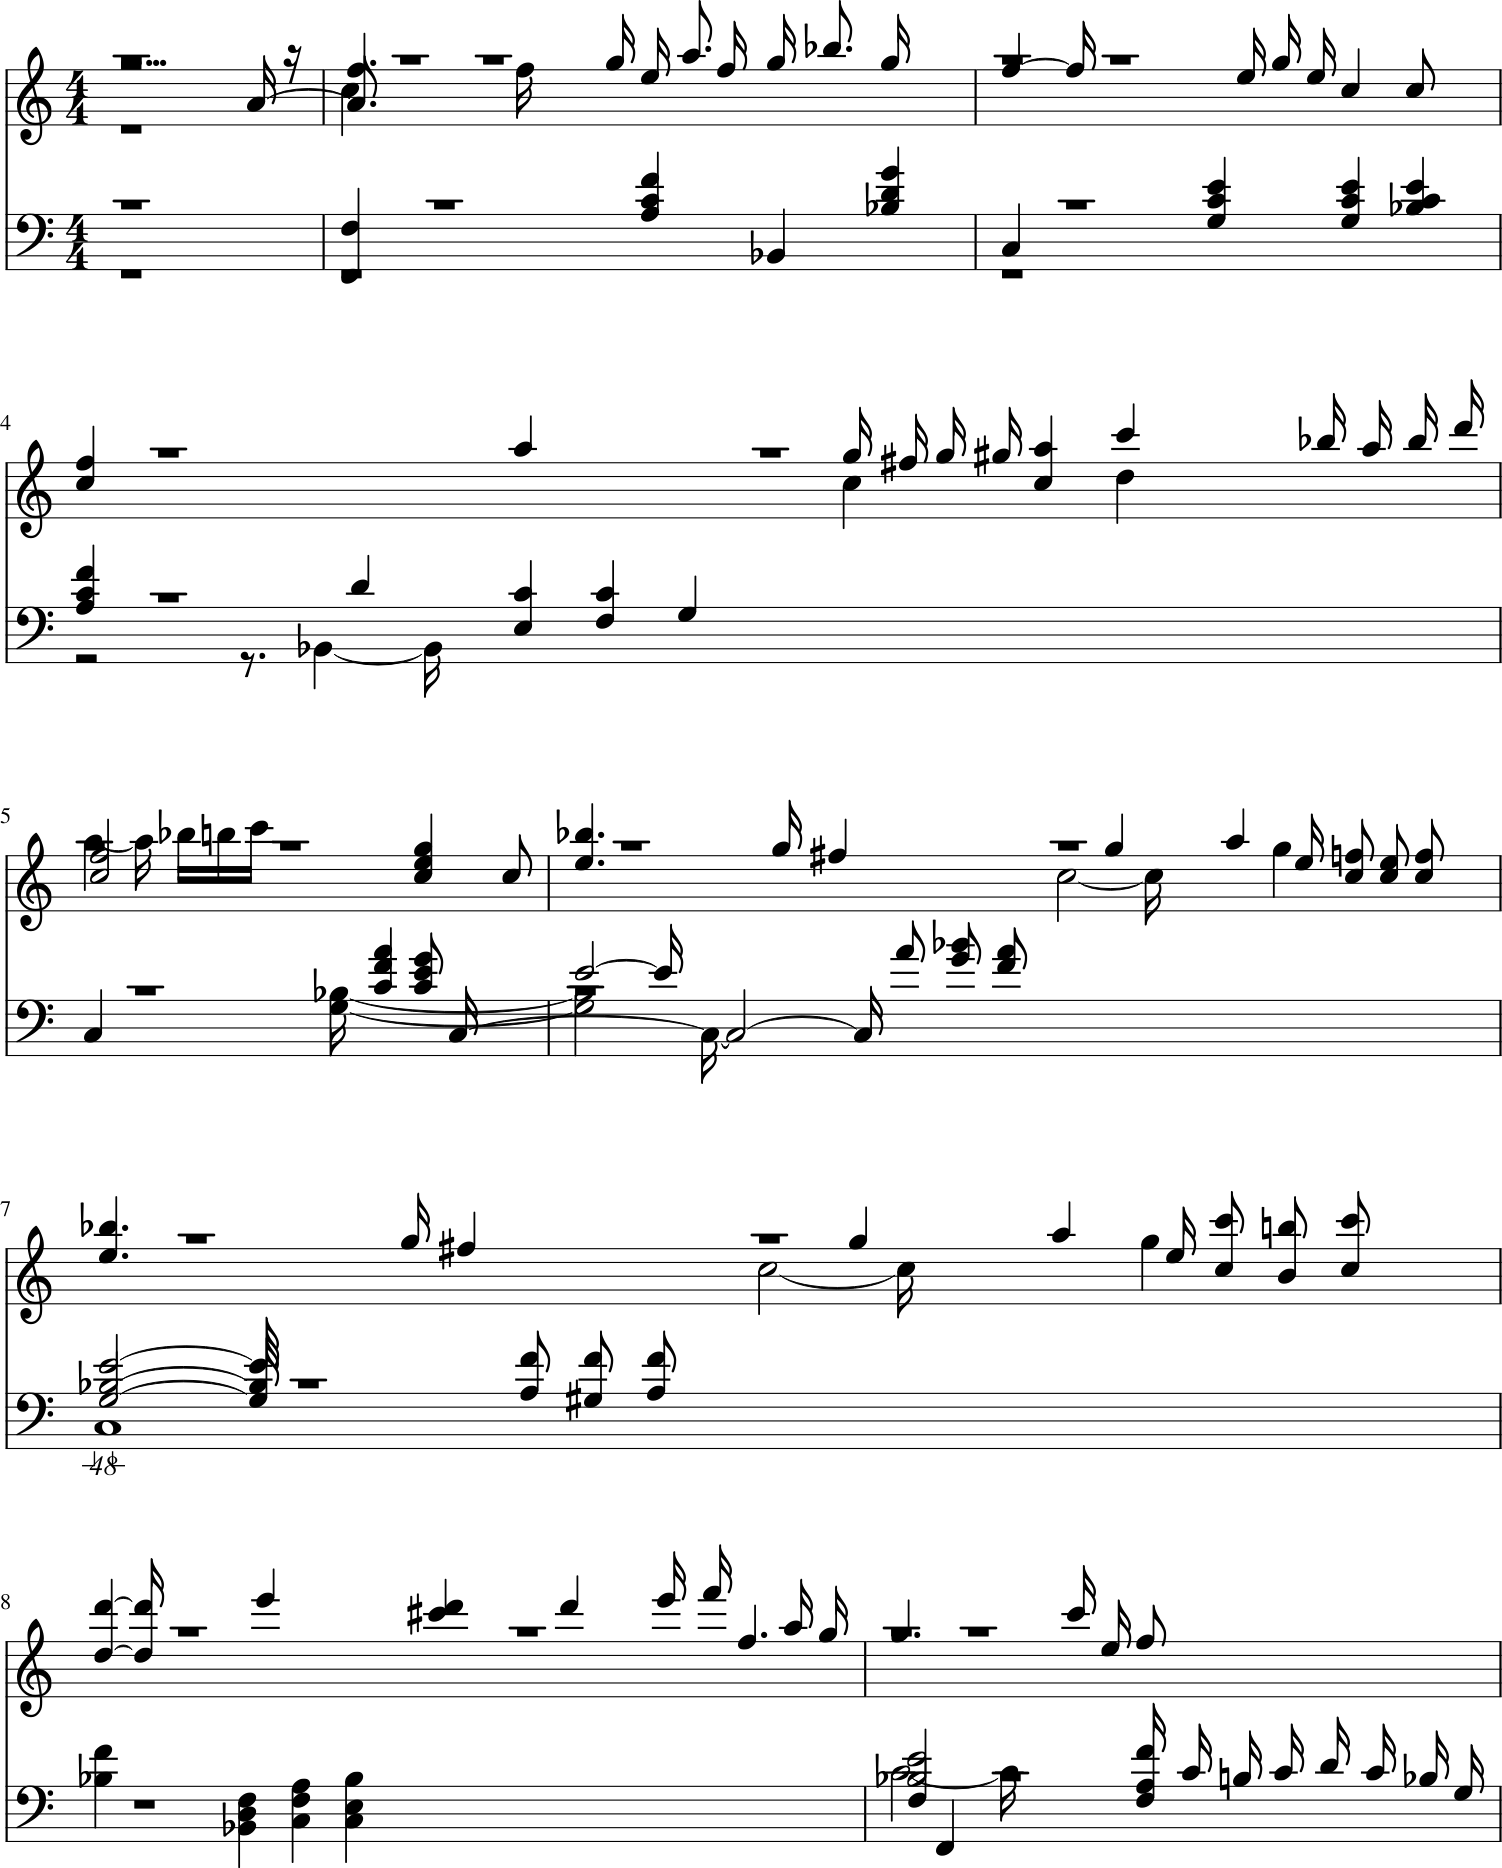

In [ ]:
item.show()

In [ ]:
pred, full = learn.predict(item, n_words=100)

/usr/local/lib/python3.7/dist-packages/musicautobot/music_transformer/model.py:63: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  bar_pos = pos // self.beat_len % self.max_bar_len
/usr/local/lib/python3.7/dist-packages/musicautobot/music_transformer/learner.py:120: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  if ((last_pos - start_pos

Non midi note detected. Only returning valid portion. Index, seed 5 (50, 2)


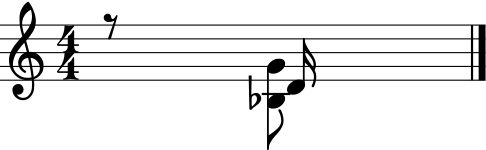

In [ ]:
pred.show()

In [ ]:
pred.play()

In [ ]:
pred #Training is successful, but the amount of score is too small. We just try it to see the difference between self-training and pre-training models.


MusicItem - (100,)
xxsep d2 n67 d2 n62 d1 n62 d1 n58 d2...

Non midi note detected. Only returning valid portion. Index, seed 3530 (3575, 2)


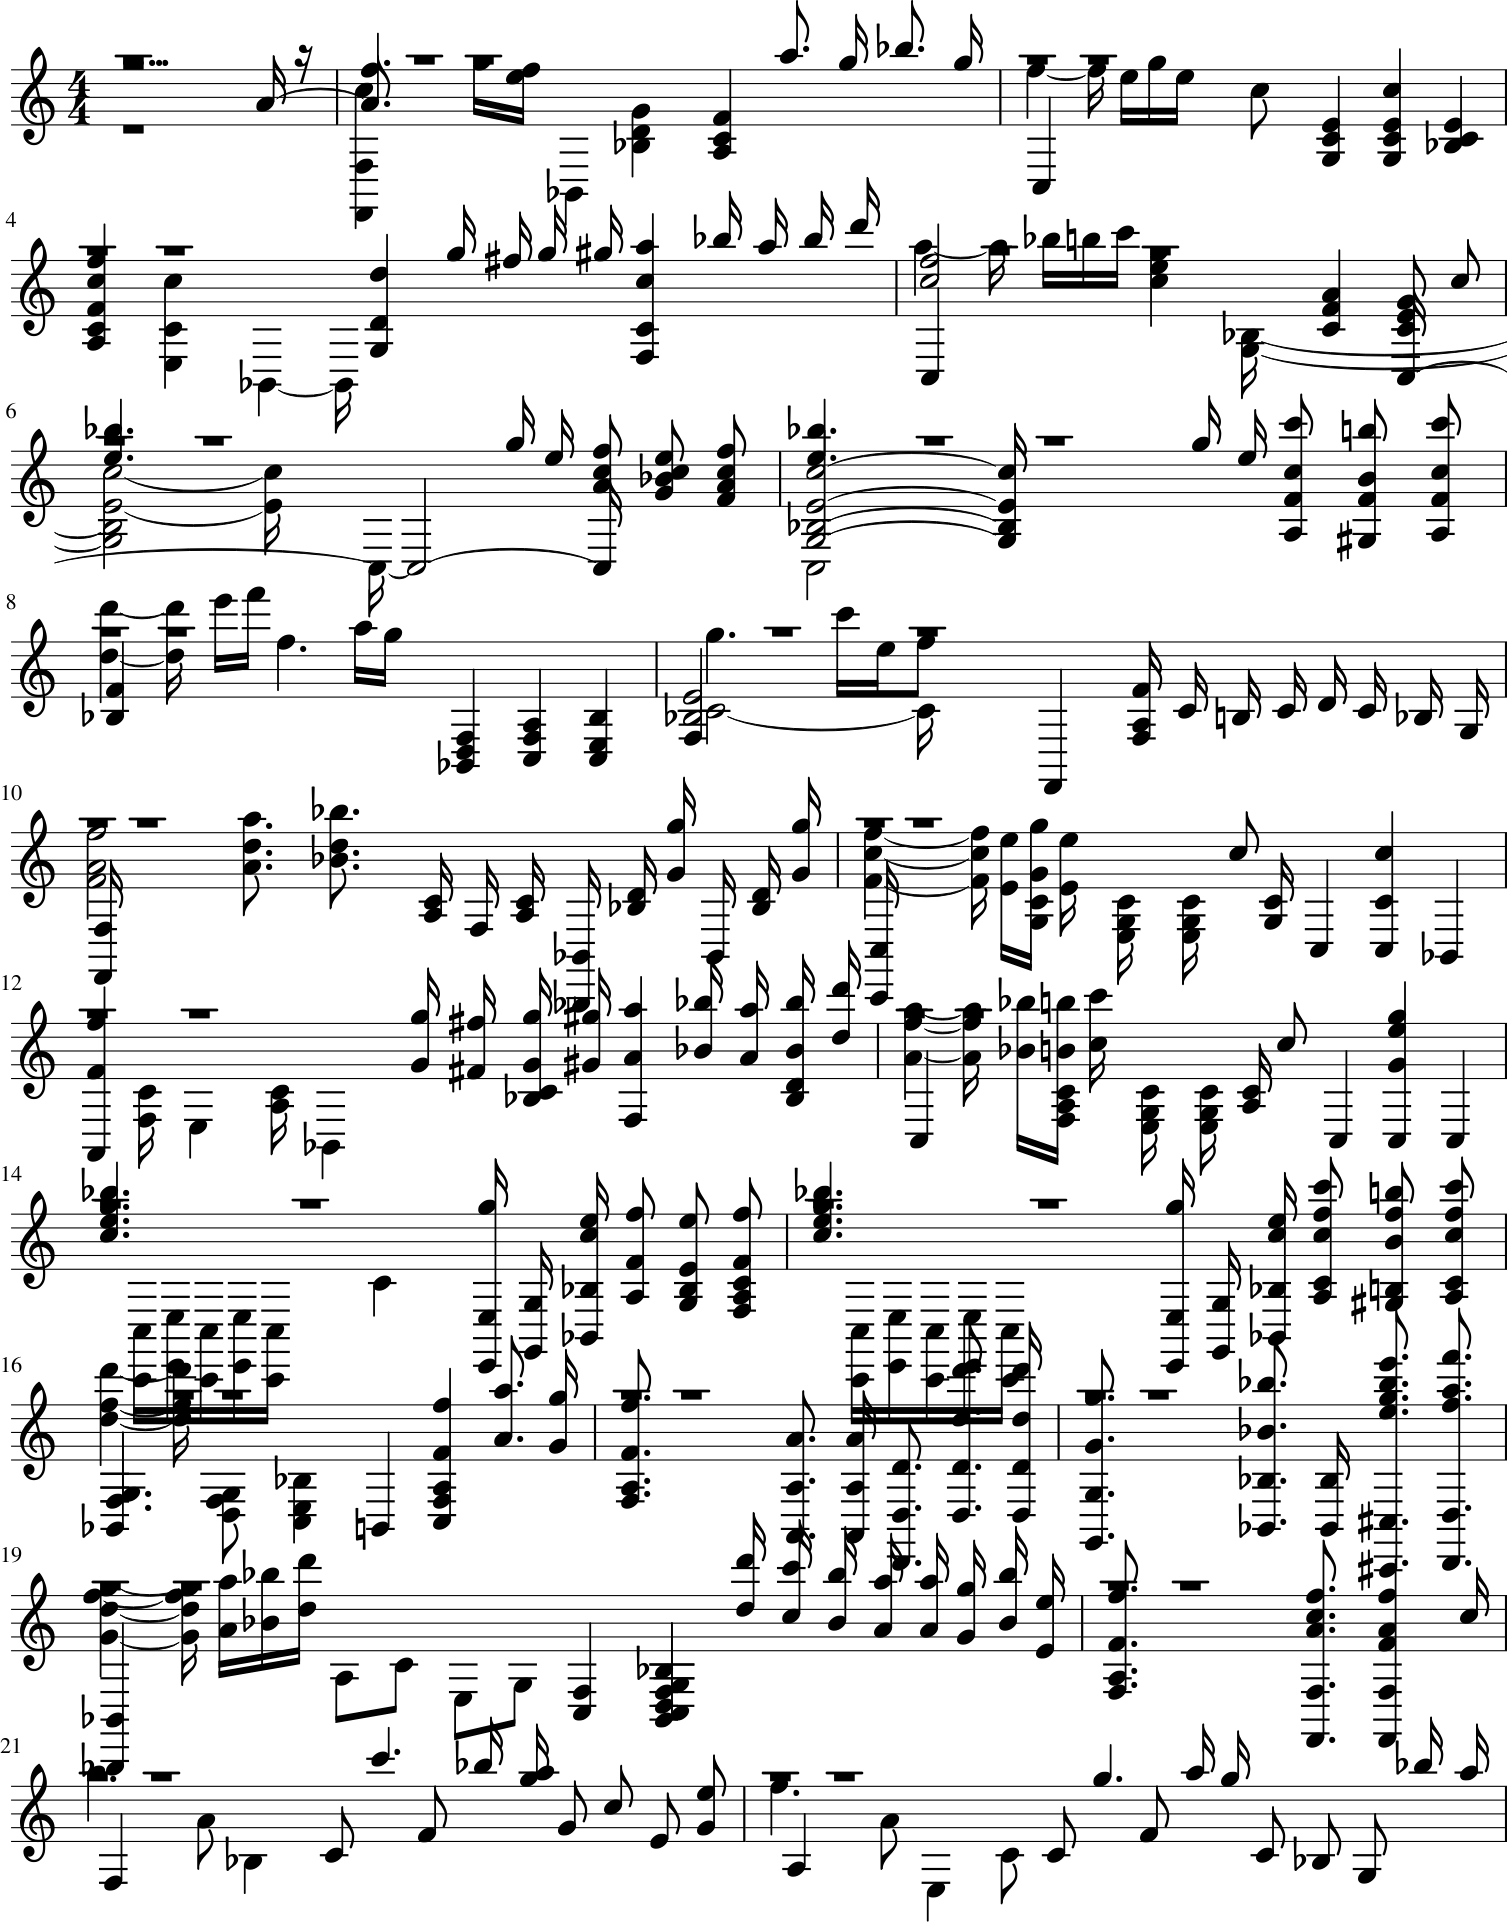

In [ ]:
full.show()

In [ ]:
full.play()

In [ ]:
full


MusicItem - (7152,)
xxbos xxpad xxsep d15 n69 d4 xxsep d1 n77 d6...

In [ ]:
!apt install musescore fluidsynth
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fluidsynth is already the newest version (1.1.9-1).
musescore is already the newest version (2.1.0+dfsg3-3build1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [ ]:
!pip install torch fastai music21 pebble fluidsynth midi2audio

In [ ]:

def play_wav(stream):
    out_midi = stream.write('midi')
    out_wav = str(Path(out_midi).with_suffix('.wav'))
    FluidSynth("font.sf2").midi_to_audio(out_midi, out_wav)
    return Audio(out_wav)

In [ ]:
play_wav(pred.stream)

NameError: ignored